# **MOVIE RECOMENDATION**

#**Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Proyek ini bertujuan untuk mengembangkan Sistem Rekomendasi Film yang canggih dan personal. Sistem ini akan menggunakan metode yaitu content-based filtering untuk memberikan rekomendasi film yang sesuai dengan preferensi masing-masing pengguna. Fokus utama adalah memberikan pengalaman rekomendasi yang lebih akurat dan personal, sehingga meningkatkan kepuasan dan keterlibatan pengguna dalam mengeksplorasi dunia film.

##**Assess Situation**

  1. Pengguna sering kali merasa kesulitan untuk menemukan film yang sesuai dengan selera mereka.
  2. Sistem rekomendasi yang ada belum sepenuhnya memahami preferensi unik setiap pengguna, sehingga seringkali memberikan rekomendasi yang kurang akurat.

##**Data Mining Goals**

  1. Meningkatkan kepuasan pengguna dengan memberikan rekomendasi film yang sesuai dengan preferensi masing-masing.
  2. Meningkatkan keterlibatan pengguna dalam mengeksplorasi konten film di platform.


##**Project Plan**

  1. Mengembangkan Sistem Rekomendasi Film yang mengintegrasikan content-based filtering
  2. Menganalisis karakteristik film yang disukai oleh pengguna melalui content-based filtering untuk memberikan rekomendasi yang lebih akurat dan personal.
  3. Fleksibilitas dalam menyesuaikan preferensi pengguna akan menjadi kunci untuk meningkatkan kepuasan dan keterlibatan pengguna dalam mengeksplorasi dunia film.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Pada tugas data mining ini saya mendapatkan dataset dari website kaggle, berikut ada link dari dataset yang saya gunakan:

In [ ]:
DATA_URL = '/content/drive/MyDrive/Dataset/movies_metadata.csv'

##**Describe Data**

####Informasi Dasar

In [ ]:
movie = pd.read_csv(DATA_URL)
movie

<ipython-input-156-56db79b46abd>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie = pd.read_csv(DATA_URL)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45

Dapat dilihat dari dataset movie diatas terdapat 45.466 baris dan juga 24 kolom yang ditampilkan. Data ini masih mentah dan belum difilter untuk menyesesuaikan dengan kebutuhan.

In [ ]:
movie.head().reset_index(drop=True)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Menampilkan 5 data pertama

####Informasi Lanjutan

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

- Kolom adult
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan apakah film tersebut untuk dewasa atau tidak

- Kolom belongs_to_collection
  - Hanya memiliki 4.494 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan apakah film tersebut termasuk dalam sebuah koleksi film

- Kolom budget
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan anggaran produksi film

- Kolom genres
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan genre-genre yang dimiliki oleh film tersebut

- Kolom homepage
  - Hanya memiliki 7.782 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan halaman web resmi film tersebut

- Kolom id
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan ID unik film

- Kolom imdb_id
  - Memiliki 45.449 baris
  - Bertipe data objek
  - Menunjukkan ID IMDb film tersebut

- Kolom original_language
  - Memiliki 45.455 baris
  - Bertipe data objek
  - Menunjukkan bahasa asli film tersebut

- Kolom original_title
  - Memiliki 45.466 baris
  - Bertipe data objek
  - Menunjukkan judul film tersebut

- Kolom overview
  - Hanya memiliki 44.512 baris yang tidak null
  - Bertipe data objek
  - Memberikan ringkasan singkat/sinopsi dari film

- Kolom popularity
  - Memiliki 45.461 baris
  - Bertipe data objek
  - Menunjukkan tingkat popularitas film

- Kolom poster_path
  - Hanya memiliki 45.080 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan lokasi path poster film

- Kolom production_companies
  - Memiliki 45.463 baris
  - Bertipe data objek
  - Menunjukkan perusahaan-perusahaan yang terlibat dalam produksi film

- Kolom production_countries
  - Memiliki 45.463 baris
  - Bertipe data objek
  - Menunjukkan negara-negara yang terlibat dalam produksi film

- Kolom release_date
  - Hanya memiliki 45.379 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan tanggal rilis film

- Kolom revenue
  - Memiliki 45.460 baris
  - Bertipe data float64
  - Menunjukkan pendapatan film

- Kolom runtime
  - Hanya memiliki 45.203 baris yang tidak null
  - Bertipe data float64
  - Menunjukkan durasi film dalam menit

- Kolom spoken_languages
  - Memiliki 45.460 baris
  - Bertipe data objek
  - Menunjukkan bahasa-bahasa yang digunakan dalam film

- Kolom status
  - Hanya memiliki 45.379 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan status produksi film

- Kolom tagline
  - Hanya memiliki 20.412 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan tagline atau slogan film

- Kolom title
  - Hanya memiliki 45.460 baris yang tidak null
  - Bertipe data objek
  - Menunjukkan judul film

- Kolom video
  - Memiliki 45.460 baris
  - Bertipe data objek
  - Menunjukkan apakah film tersebut memiliki video atau tidak

- Kolom vote_average
  - Memiliki 45.460 baris
  - Bertipe data float64
  - Menunjukkan rata-rata rating yang diberikan penonton untuk film

- Kolom vote_count
  - Memiliki 45.460 baris
  - Bertipe data float64
  - Menunjukkan jumlah suara yang diberikan pada film tersebut

####Informasi Statistik Deskriptif

In [ ]:
movie.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


- Revenue
  - Jumlah pendapatan film bervariasi dari 0 hingga 2.79 miliar
  - Rata-rata pendapatan film adalah sekitar $11.2 juta

- Runtime
  - Durasi film berkisar antara 0 hingga 1.256 menit
  - Rata-rata durasi film adalah sekitar 94 menit

- Vote Average
  - Rating film berkisar dari 0 hingga 10
  - Rata-rata rating film sekitar 5.62

- Vote Count
  - Jumlah suara yang diberikan pada film bervariasi dari 0 hingga 14.075
  - Rata-rata jumlah suara yang diberikan pada film adalah sekitar 109.9

##**Exploratory Data Analysis**

In [ ]:
def genre_name(genre_list):
  return [genre["name"] for genre in eval(genre_list)]

movie["genre_name"] = movie["genres"].apply(genre_name)

In [ ]:
genre_counts = movie["genre_name"].explode().value_counts()
genre_counts

Drama                                    20265
Comedy                                   13182
Thriller                                  7624
Romance                                   6735
Action                                    6596
Horror                                    4673
Crime                                     4307
Documentary                               3932
Adventure                                 3496
Science Fiction                           3049
Family                                    2770
Mystery                                   2467
Fantasy                                   2313
Animation                                 1935
Foreign                                   1622
Music                                     1598
History                                   1398
War                                       1323
Western                                   1042
TV Movie                                   767
Carousel Productions                         1
Vision View E

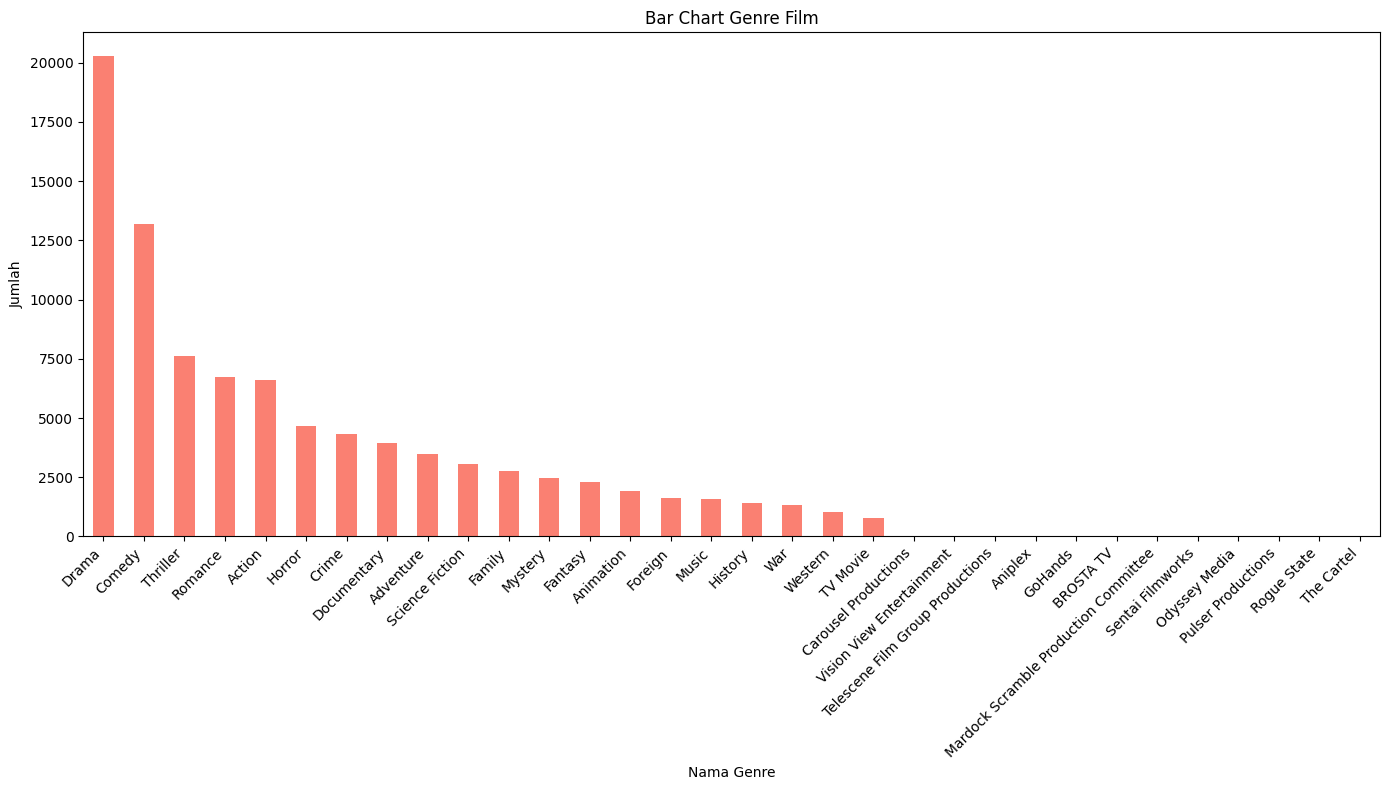

In [ ]:
plt.figure(figsize=(14,8))
genre_counts.plot(kind="bar", color="salmon")
plt.title("Bar Chart Genre Film")
plt.xlabel("Nama Genre")
plt.ylabel("Jumlah")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Bisa dilihat pada visualisasi diatas Genre Drama mendominasi jumlah film dalam dataset, menunjukkan popularitas yang tinggi di antara penghasilan film. Selain Drama, genre seperti Comedy, Thriller, Romance, dan Action juga memiliki jumlah yang cukup tinggi, menunjukkan popularitas yang konsisten.

Namun beberapa genre juga memiliki jumlah film yang lebih rendah, seperti Western, TV Movie, dan Foreign. Ini mungkin mencerminkan preferensi yang lebih khusus atau fokus pada pasar tertentu. Dan juga terdapat entitas yang bukan genre film sebenarnya seperti carousel productions dan vision view entertainment, yang mungkin merupakan kesalahan atau perlu diidentifikasi dan ditangani secara khusus.



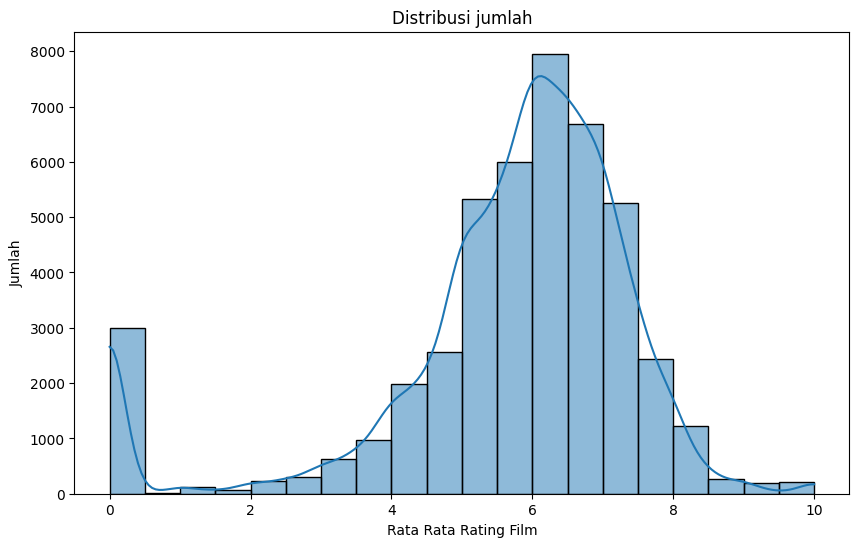

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(movie['vote_average'], bins=20, kde=True)
plt.title('Distribusi jumlah')
plt.xlabel('Rata Rata Rating Film')
plt.ylabel('Jumlah')
plt.show()

Bisa kita lihat pada visualisasi diatas menunjukkan bahwa sebagian besar film memiliki peringkat di sekitar 5 hingga 7.5, dengan puncak distribusi terletak di sekitar nilai 6. Ini menunjukkan bahwa mayoritas film cenderung mendapatkan peringkat yang relatif positif.

##**Verify Data Quality**

####Missing Values

In [ ]:
missing_values = movie.isnull().sum()
print(missing_values)

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
genre_name                   0
dtype: int64


Penjelasan mengenai nilai kosong dalam dataset movie:

1. adult: Tidak ada nilai kosong, setiap film memiliki klasifikasi apakah untuk dewasa atau tidak

2. belongs_to_collection: Terdapat 40.972 nilai kosong, banyak film yang tidak termasuk dalam koleksi tertentu

3. budget: Tidak ada nilai kosong, setiap film memiliki data anggaran produksi

4. genres: Tidak ada nilai kosong,setiap film mencantumkan genre-genre yang dimilikinya

5. homepage: Terdapat 37.684 nilai kosong, mayoritas film tidak memiliki halaman web resmi

6. id: Tidak ada nilai koong, setiap film memiliki ID unik

7. imdb_id: Hanya 17 nilai kosong, hampir semua film memiliki ID IMDb

8. original_language: Hanya 11 nilai kosong, setiap film memiliki bahasa asli yang diidentifikasi

9. original_title: Tidak ada nilai kosong, setiap film mencantumkan judul asli

10. overview: Terdapat 954 nilai kosong, sekitar 954 film tidak memiliki ringkasan overview

11. popularity: Hanya 5 nilai kosong, popularitas film umumnya tercatat

12. poster_path: Terdapat 386 nilai kosong, poster film tidak tersedia untuk beberapa film

13. production_companies: Hanya 3 nilai kosong, sebagian besar film mencantumkan perusahaan produksi yang terlibat

14. production_countries: Hanya 3 nilai kosong. Hampir semua film menunjukkan negara produksi.

15. release_date: Terdapat 87 nilai kosong, sebagian kecil film tidak memiliki tanggal rilis

16. revenue: Hanya 6 nilai kosong, sebagian kecil film tidak memiliki data pendapatan

17. runtime: Terdapat 263 nilai kosong, beberapa film tidak memiliki informasi durasi

18. spoken_languages: Hanya 6 nilai kosong, hampir setiap film mencantumkan bahasa yang digunakan

19. status: Terdapat 87 nilai kosong, beberapa film tidak memiliki status produksi yang jelas

20. tagline: Terdapat 25.054 nilai kosong, banyak film yang tidak memiliki tagline khusus

21. title: Hanya 6 nilai kosong, sebagian kecil film tidak memiliki judul

22. video: Hanya 6 nilai kosong, mayoritas film tidak memiliki tautan video terkait

23. vote_average: Hanya 6 nilai kosong, hampir setiap film memiliki peringkat rata-rata

24. vote_count: Hanya 6 nilai kosong, hampir setiap film memiliki jumlah suara yang diberikan

####Outliers Values

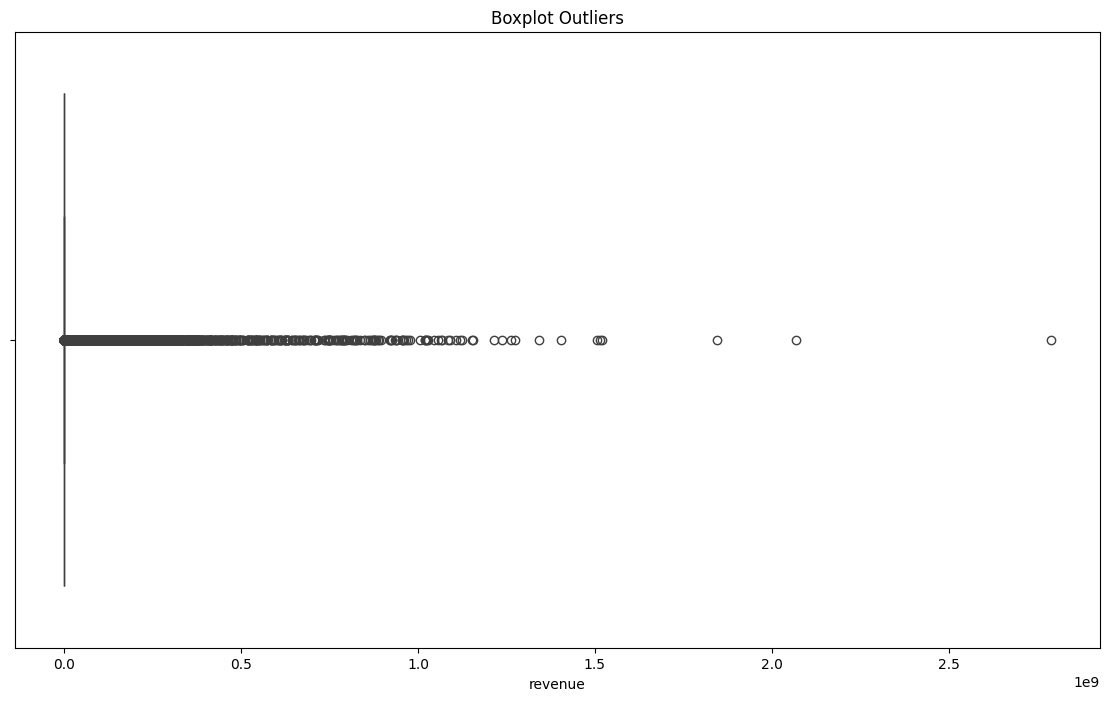

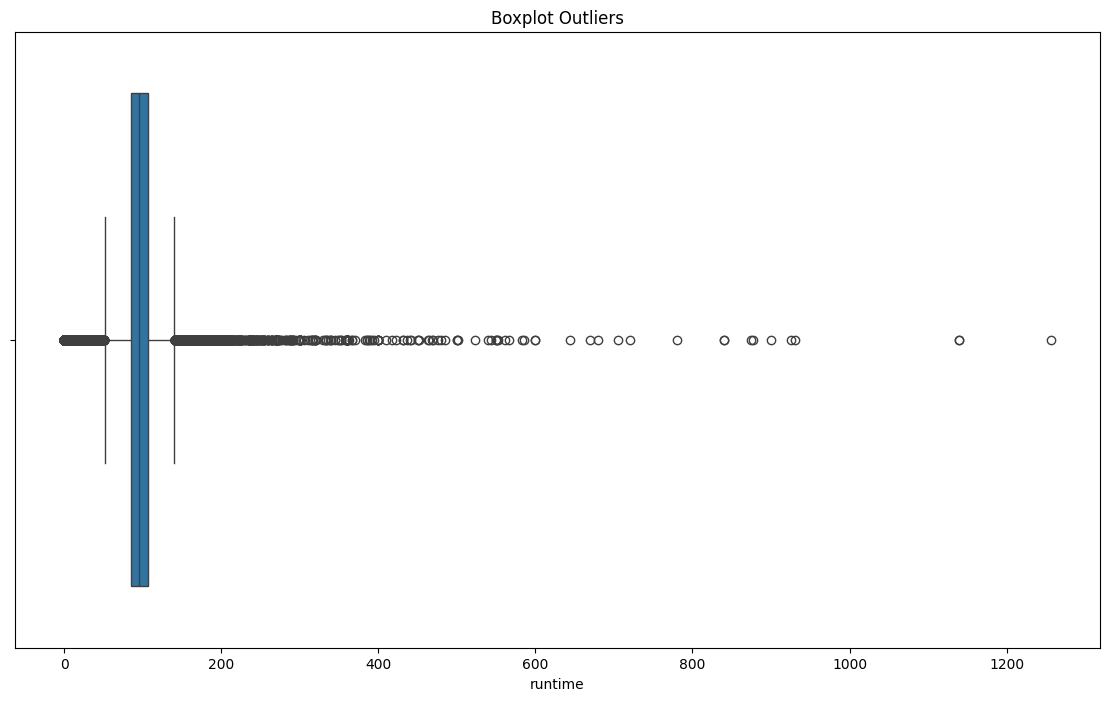

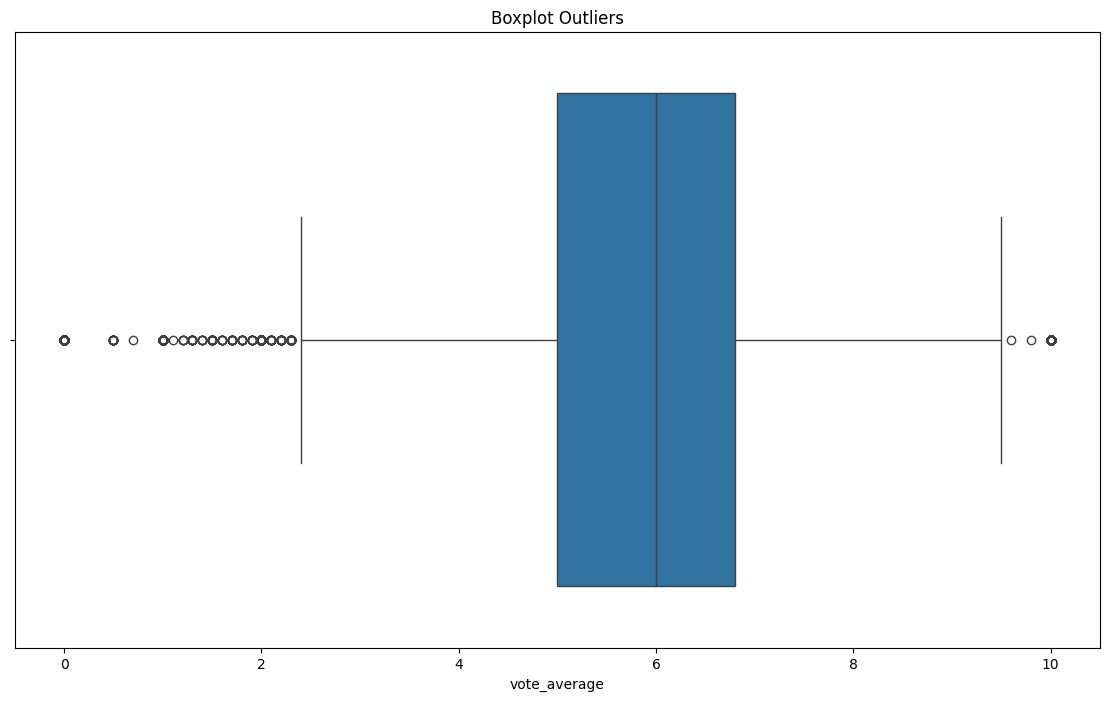

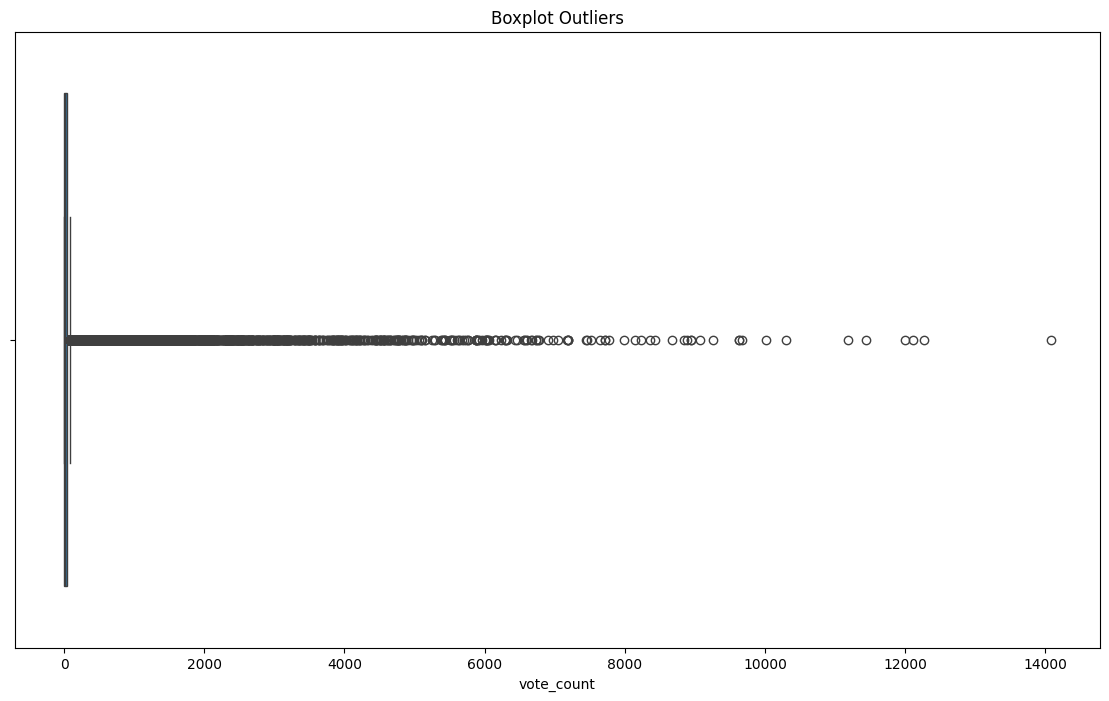

In [ ]:
columns = [ "revenue", "runtime","vote_average", "vote_count"]
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=movie[col])
  plt.title("Boxplot Outliers")
  plt.show()

- Boxplot untuk revenue
  
  Titik titik di luar garis batas menunjukkan adanya nilai-nilai yang jauh dari nilai-nilai lainnya. Dalam konteks ini kayanya outliers dapat mengindikasikan film-film dengan pendapatan yang sangat tinggi
- Boxplot untuk runtime

  Titik titik di luar garis batas menunjukkan adanya nilai-nilai yang jauh dari nilai-nilai lainnya. Dalam konteks ini utliers dapat memberikan wawasan tentang film-film dengan durasi yang tidak biasa
- Boxplot untuk vote_average

  Titik titik di luar garis batas menunjukkan adanya outliers dalam nilai vote_average. Dalam konteks ini outliers dapat memberikan wawasan tentang film-film dengan rating yang signifikan secara positif atau negatif
- Boxplot untuk vote_count:

  Titik titik di luar garis batas menunjukkan adanya outliers dalam jumlah vote. Dalam konteks ini outliers dapat menunjukkan film-film yang menerima jumlah vote yang signifikan mungkin karena popularitas atau kontroversi tertentu

####Duplicated Values

In [ ]:
duplicate_values = movie["imdb_id"].duplicated().sum()
print(f"Kolom imdb_id memiliki duplikat value sebanyak: {duplicate_values}")

Kolom imdb_id memiliki duplikat value sebanyak: 48


In [ ]:
duplicate_values = movie["id"].duplicated().sum()
print(f"Kolom id memiliki duplikat value sebanyak: {duplicate_values}")

Kolom id memiliki duplikat value sebanyak: 30


In [ ]:
duplicate_values = movie["original_title"].duplicated().sum()
print(f"Kolom original_title memiliki duplikat value sebanyak: {duplicate_values}")

Kolom original_title memiliki duplikat value sebanyak: 2093


In [ ]:
duplicate_values = movie["overview"].duplicated().sum()
print(f"Kolom overview memiliki duplikat value sebanyak: {duplicate_values}")

Kolom overview memiliki duplikat value sebanyak: 1158


In [ ]:
duplicate_values = movie["popularity"].duplicated().sum()
print(f"Kolom popularity memiliki duplikat value sebanyak: {duplicate_values}")

Kolom popularity memiliki duplikat value sebanyak: 1289


Dapat kita lihat pada output diatas menampilkan nilai nilai duplikat dari beberapa kolom dataset yang ingin kita pakai untuk analisa kedepannya

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Value**

#####**Pengecekan Missing Values**

In [ ]:
print((movie.isna().sum() / len(movie)) * 100)

adult                     0.000000
belongs_to_collection    90.115691
budget                    0.000000
genres                    0.000000
homepage                 82.883913
id                        0.000000
imdb_id                   0.037391
original_language         0.024194
original_title            0.000000
overview                  2.098271
popularity                0.010997
poster_path               0.848986
production_companies      0.006598
production_countries      0.006598
release_date              0.191352
revenue                   0.013197
runtime                   0.578454
spoken_languages          0.013197
status                    0.191352
tagline                  55.104914
title                     0.013197
video                     0.013197
vote_average              0.013197
vote_count                0.013197
genre_name                0.000000
dtype: float64


Ini adalah output dalam persentase yang  bisa dijadikan sebagai acuan untuk pengambilan keputusan terhadap apa yang akan dilakukan pada nilai kosong. Jika dilihat pada output missing diatas kita dapat menghapus beberapa kolom karena memiliki banyak missing value

In [ ]:
movie[movie['belongs_to_collection'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_name
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]"
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"[Action, Crime, Drama, Thriller]"
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,"[Comedy, Romance]"
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"[Action, Adventure, Drama, Family]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,"[Drama, Family]"
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,[Drama]
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,"[Acti

Menampilkan nilai kosong pada kolom belongs_to_collection yaitu sebanyak 40.972 baris atau sekitar 90% dari nilai yang seharusnya ada

In [ ]:
movie[movie['homepage'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_name
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]"
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]"
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,[Comedy]
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"[Action, Crime, Drama, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45460,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,False,5.7,26.0,"[Drama, Action, Romance]"
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,[Drama]
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United State

Menampilkan nilai kosong pada kolom homepage yaitu sebanyak 37.684 baris atau sekitar 82% dari nilai yang seharusnya ada

In [ ]:
movie[movie['tagline'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,genre_name
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]"
11,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,12110,tt0112896,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,5.430331,/xve4cgfYItnOhtzLYoTwTVy5FGr.jpg,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-12-22,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0,"[Comedy, Horror]"
27,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,17015,tt0114117,en,Persuasion,This film adaptation of Jane Austen's last nov...,2.228434,/si8911IezMvAnQFDvyg1nKzDlD.jpg,"[{'name': 'BBC Films', 'id': 288}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-09-27,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Persuasion,False,7.4,36.0,"[Drama, Romance]"
32,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",NaN,78802,tt0114952,fr,"Guillaumet, les ailes du courage",NaN,0.745542,/k6ODtR38dKEfuzSGjggr8KDyAF4.jpg,"[{'name': 'Iwerks Entertainment', 'id': 70801}]","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1996-09-18,0.0,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wings of Courage,False,6.8,4.0,"[Romance, Adventure]"
35,False,NaN,11000000,"[{'id': 18, 'name': 'Drama'}]",NaN,687,tt0112818,en,Dead Man Walking,A justice drama based on a true story about a ...,6.891317,/y19uRkAHXOHLeySuBVMqnvVnsrA.jpg,"[{'name': 'Havoc', 'id': 406}, {'name': 'PolyG...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-29,39363635.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Dead Man Walking,False,7.3,350.0,[Drama]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,0.661558,/4lF9LH0b0Z1X94xGK9IOzqEW6k1.jpg,"[{'name': 'Concorde-New Horizons', 'id': 4688}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Caged Heat 3000,False,3.5,1.0,[Science Fiction]
45460,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",5.683753,/fQC46NglNiEMZBv5XHoyLuOWoN5.jpg,"[{'name': 'Westdeutscher Rundfunk (WDR)', 'id'...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,False,5.7,26.0,"[Drama, Action, Romance]"
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,[Drama]
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermol

Menampilkan nilai kosong pada kolom tagline yaitu sebanyak 25.054 baris atau sekitar 55% dari nilai yang seharusnya ada

#####**Hapus Missing Values**

Menghapus kolom belongs_to_collection, homepage, dan tagline karena memiliki presentase nilai kosong lebih dari 55%

In [ ]:
movie = movie.drop(['belongs_to_collection', 'homepage', 'tagline'], axis=1)

In [ ]:
movie

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,genre_name
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0,"[Animation, Comedy, Family]"
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0,"[Adventure, Fantasy, Family]"
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0,"[Romance, Comedy]"
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0,"[Comedy, Drama, Romance]"
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0,[Comedy]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,False,4.0,1.0,"[Drama, Family]"
45462,False,0,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0,[Drama]
45463,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0,"[Action, Drama, Thriller]"
45464,False,0,[],227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0,[]


Bisa dilihat pada output data diatas, bahwa kolom belongs_to_collection, homepage, dan tagline sudah terhapus

#####**Imputasi Missing Values**

Melakukan imputsi pada nilai kolom missing yang akan digunakan kedepannya agar dapat digunakan untuk kebutuhan data lebih lanjut. Pada tahap ini kita akan mengimputasi kolom vote_average

In [ ]:
movie['vote_average'].dropna().describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [ ]:
movie['vote_average'].fillna(movie['vote_average'].median(), inplace=True)

Bisa dilihat dari hasil analisis statistik diatas, kita dapat menggunakan nilai median untuk mengisi nilai yang kosong agar data lebih stabil dan juga  terdapat outliers dalam kolom vote_average, maka median dapat memberikan gambaran yang lebih baik dari pada mean karena kita dapat mengurangi dampak outliers terhadap statistik keseluruhan

#####**Pengecekan Ulang**

In [ ]:
movie.isnull().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                  17
original_language        11
original_title            0
overview                954
popularity                5
poster_path             386
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
spoken_languages          6
status                   87
title                     6
video                     6
vote_average              0
vote_count                6
genre_name                0
dtype: int64

Bisa kita lihat pada kolom vote_average missing value nya sudah 0, maka data missing sebelumnya sudah terisi dengan nilai median statistik data tersebut. Mengapa hanya kolom vote_average saja yang kita imputasi, karena kita hanya akan memakai kolom vote_average, original_title, dan genres saja untuk tahap selanjutnya

##**Data Reduction**

###**Mengurangi Fitur-Fitur yang Kurang Relevan**

In [ ]:
new_movie = movie[['original_title', 'genres', 'vote_average']]

Pada tahapan ini kita mengurangi kolom kolom yang kurang relevan atau tidak dipakai untuk analisis kedepannya, jadi dapat dilihat diatas kita membuat data baru bernama new_movie dengan isi kolom original title, genres, dan vote_average saja

###**Pengecekan Hasil**

In [ ]:
new_movie

,original_title,genres,vote_average
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",7.7
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",6.5
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6.1
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",5.7
...,...,...,...
45461,رگ خواب,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",4.0
45462,Siglo ng Pagluluwal,"[{'id': 18, 'name': 'Drama'}]",9.0
45463,Betrayal,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",3.8
45464,Satana likuyushchiy,[],0.0


Menampilkan data new_movie yang dibuat tadi dengan berisi kolom original_title, genres, dan vote_average saja

##**Data Transformation**

###**Mengubah isi kolom genres**

Selanjutnya masuk ke tahap data transformation, disini kita mengubah isi dari kolom genres yang sebelumnya yaitu dictionary dan susah untuk diolah, kita ubah menjadi string agar lebih mudah


In [ ]:
new_movie['genres'] = new_movie['genres'].apply(lambda x: ', '.join([d['name']for d in eval(x)]))

<ipython-input-182-6ae0c68c093b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movie['genres'] = new_movie['genres'].apply(lambda x: ', '.join([d['name']for d in eval(x)]))


###**Pengecekan Hasil**

In [ ]:
new_movie

,original_title,genres,vote_average
0,Toy Story,"Animation, Comedy, Family",7.7
1,Jumanji,"Adventure, Fantasy, Family",6.9
2,Grumpier Old Men,"Romance, Comedy",6.5
3,Waiting to Exhale,"Comedy, Drama, Romance",6.1
4,Father of the Bride Part II,Comedy,5.7
...,...,...,...
45461,رگ خواب,"Drama, Family",4.0
45462,Siglo ng Pagluluwal,Drama,9.0
45463,Betrayal,"Action, Drama, Thriller",3.8
45464,Satana likuyushchiy,,0.0


Menampilkan data new_movie, kita bisa fokus pada kolom genres karena itu yang tadi kita ubah, bisa dilihat bahwa nilai nya udah berubah menjadi tipe data string

###**Penanganan Duplicated Value**

#####**Pengecekan Nilai Duplikat**

Setelah semua data sudah sesuai, kita dapat mengecek nilai duplikat yang ada dari data

In [ ]:
new_movie[new_movie.duplicated()]

,original_title,genres,vote_average
1465,Das Versprechen,"Drama, Romance",5.0
9165,Le Samouraï,"Crime, Drama, Thriller",7.9
9327,The Warrior,"Adventure, Animation, Drama, Action, Foreign",6.3
12066,Bubble,"Drama, Crime, Mystery",6.4
13375,Blackout,"Thriller, Mystery",6.7
15074,A Farewell to Arms,"Drama, Romance, War",6.2
15765,Offside,"Drama, Comedy, Foreign",6.7
16764,Blackout,"Thriller, Mystery",6.7
18908,Hamlet,Drama,7.3
20843,Black Gold,"Adventure, Drama",5.9


Bisa dilihat diatas menampilkan nilai nilai duplikat dari data new_movie

#####**Hapus Nilai Duplikat**

In [ ]:
new_movie = new_movie.drop_duplicates()

Disini kita menghapus nilai nilai duplikat yang ada pada new_movie

In [ ]:
new_movie[new_movie.duplicated()]

,original_title,genres,vote_average


Menampilkan nilai duplikat pada data, bisa dilihat bahwa nilai duplikat tadi sudah terhapus atau sudah tidak ada

###**Penanganan Outliers**

#####**Pengecekan Outliers**

Pada tahapan ini kita mengecek apakah ada outliers dari kolom kolom yang ada

In [ ]:
results = []

cols = new_movie.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = new_movie[col].quantile(0.25)
  q3 = new_movie[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = new_movie[(new_movie[col] < lower_bound) | (new_movie[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(new_movie))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_new_movie = pd.DataFrame(results)
results_new_movie.set_index('Kolom', inplace=True)
results_new_movie = results_new_movie.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_new_movie)

Kolom,Persentase Outliers
vote_average,7.92393


Menampilkan hasil presentase outliers pada kolom vote_average sekitar hampir 8%

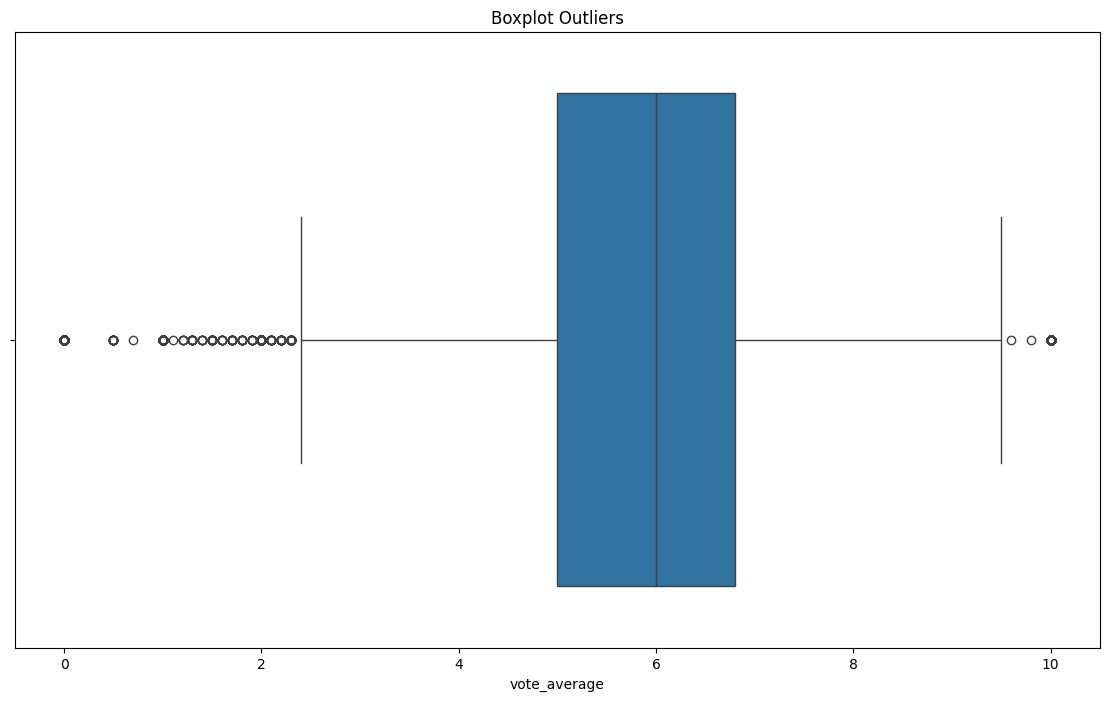

In [ ]:
columns = ["vote_average"]
for col in columns:
  plt.figure(figsize=(14, 8))
  sns.boxplot(x=new_movie[col])
  plt.title("Boxplot Outliers")
  plt.show()

Bisa dilihat gambar dari boxplot kolom vote_average diatas bahwa terdapat nilai nilai yang tidak seperti biasanya atau keluar dari rentang nilai normal

#####**Hapus Outliers**

In [ ]:
Q1 = new_movie['vote_average'].quantile(0.25)
Q3 = new_movie['vote_average'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_movie = new_movie[(new_movie['vote_average'] >= lower_bound) & (new_movie['vote_average'] <= upper_bound)]

Disini kita menghapus nilai outliers pada kolom vote_average agar kita dapat menjaga kestabilitas analisis statistik sehingga memberikan gambaran yang lebih akurat tentang pusat distribusi data

#####**Pengecekan Ulang**

In [ ]:
results = []

cols = new_movie.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = new_movie[col].quantile(0.25)
    q3 = new_movie[col].quantile(0.75)
    iqr = q3 - q1
    # Sesuaikan faktor IQR sesuai kebutuhan
    lower_bound = q1 - 2*iqr
    upper_bound = q3 + 2*iqr
    outliers = new_movie[(new_movie[col] < lower_bound) | (new_movie[col] > upper_bound)]
    percent_outliers = (len(outliers)/len(new_movie))*100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_new_movie = pd.DataFrame(results)
results_new_movie.set_index('Kolom', inplace=True)
results_new_movie = results_new_movie.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_new_movie)

Kolom,Persentase Outliers
vote_average,0.0


Setelah kita cek ulang dapat dilihat bahwa sudah tidak ada lagi nilai outliers pada kolom vote_average

##**Construct Data**

###**Melakukan Rekayasa Fitur**

In [ ]:
def add_description(row):
    if row['vote_average'] >= 8:
        return 'Very Good'
    elif row['vote_average'] >= 5 and row['vote_average'] < 8:
        return 'Good'
    else:
        return 'Bad'

new_movie['category'] = new_movie.apply(add_description, axis=1)

Pada rekaya fitur ini, kita membuat kolom baru yaitu category untuk memberikan pemahaman yang lebih mudah dipahami tentang bagaimana penilaian "vote_average" dapat dikelompokkan ke dalam kategori kualitas tertentu. Dan kita juga dapat dengan cepat melihat dan menganalisis distribusi atau pola pada tingkat kualitas film berdasarkan kategori yang ditentukan

###**Pengecekan Hasil**

In [ ]:
new_movie

,original_title,genres,vote_average,category
0,Toy Story,"Animation, Comedy, Family",7.7,Good
1,Jumanji,"Adventure, Fantasy, Family",6.9,Good
2,Grumpier Old Men,"Romance, Comedy",6.5,Good
3,Waiting to Exhale,"Comedy, Drama, Romance",6.1,Good
4,Father of the Bride Part II,Comedy,5.7,Good
...,...,...,...,...
45459,Caged Heat 3000,Science Fiction,3.5,Bad
45460,Robin Hood,"Drama, Action, Romance",5.7,Good
45461,رگ خواب,"Drama, Family",4.0,Bad
45462,Siglo ng Pagluluwal,Drama,9.0,Very Good


Menampilkan data yang siap untuk dibuat model dengan memakai kolom kolom yang diperlukan serta menambahkan kolom category

#**Modelling Associate**

#####**Core Library**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

#####**Library Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

#####**Library Normalisasi Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

#####**Library Build Model**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

###**Pre-Processing**

#####**Adjusment**

In [ ]:
data = new_movie.head(1000)

membuat variabel baru dengan nama "data" yang dimana akan menampilkan data dari new_movie dengan 1000 baris teratas  agar lebih ringan untuk tahap modelling

In [ ]:
data_encoded = data.drop(['genres', 'category'], axis=1)

mempersiapkan data dengan membuat variabel "data_encoded" lalu kita drop atau hilangkan kolom genres dan category dari dataframe 'data' yg kita buat sebelumnya

In [ ]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '), lowercase=False)
X = vectorizer.fit_transform(data['genres'])
genres_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=data.index)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


dengan menggunakan 'CountVectorizer' kita dapat mengencoding data genre film dimana setiap kolom akan merpresentasikan satu genre dengan nilai 1 jika iya, dan 0 jika tidak

In [ ]:
data_encoded = pd.concat([data_encoded, genres_df], axis=1)

lalu kita dapat menggabungkan fitur original title dengan hasil encoding dari genre film yang sudah dibuat sebelumnya

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['original_title'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out(), index=data.index)

dengan menggunakan metode TF-IDF kita dapat melakukan konversi kolom original_title yang sebelumnya berupa kata menjadi fitur numerik. tujuannya adalah untuk memberikan pemahaman lebih pada kolom original_title yang kemungkinan memiliki kemiripan kata kata pada nilai lainnya

In [ ]:
data_encoded = pd.concat([data_encoded, tfidf_df], axis=1)

setelah itu kita gabungkan fitur TF-IDF yg telah dikonversi tadi dengan dataframe 'data_encoded' yg bertujuan untuk menyatukan informasi dari fitur fitur yang sudah diproses sebelumnya sehingga dapat digunakan dalam analisis pemodelan nanti

#####**Normalisasi Data**

In [ ]:
scaler = StandardScaler()
data_encoded['vote_average'] = scaler.fit_transform(data_encoded[['vote_average']])

melakukan normalisasi pada fitur vote_average menggunakan StandardScaler untuk memastikan bahwa semua fitur memiliki skala yang seragam dan tidak ada satu fitur yang mendominasi perhitungan analisis

In [ ]:
pd.options.display.max_columns = None
data_encoded

original_title  vote_average     Action  \
0                                Toy Story      1.422880  0       0   
1                                  Jumanji      0.650415  0       0   
2                         Grumpier Old Men      0.264183  0       0   
3                        Waiting to Exhale     -0.122049  0       0   
4              Father of the Bride Part II     -0.508282  0       0   
...                                    ...           ... ..     ...   
1041                        For the Moment      1.133206  0       1   
1042   Willy Wonka & the Chocolate Factory      1.133206  0       0   
1043  La vie sexuelle des Belges 1950-1978     -1.184188  0       0   
1044                         The Innocents      1.229764  0       0   
1045                               Sleeper      0.746973  0       0   

      Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0             0          1       1      0            0      0       1   
1             1          0       0      0            0      0       1   
2             0          0       1      0            0      0       0   
3             0          0       1      0            0      1       0   
4             0          0       1      0            0      0       0   
...         ...        ...     ...    ...          ...    ...     ...   
1041          0          0       0      0            0      1       0   
1042          0          0       0      0            0      0       1   
1043          0          0       1      0            0      0       0   
1044          0          0       0      0            0      0       0   
1045          0          0       1      0            0      0       0   

      Fantasy  Foreign  History  Horror  Music  Mystery  Romance  \
0           0        0        0       0      0        0        0   
1           1        0        0       0      0        0        0   
2           0        0        0       0      0        0        1   
3           0        0        0       0      0        0        1   
4           0        0        0       0      0        0        0   
...       ...      ...      ...     ...    ...      ...      ...   
1041        0        0        0       0      0        0        1   
1042        1        0        0       0      0        0        0   
1043        0        0        0       0      0        0        1   
1044        0        0        0       1      0        0        0   
1045        0        0        0       0      0        0        1   

      Science Fiction  TV Movie  Thriller  War  Western  000   06   13  \
0                   0         0         0    0        0  0.0  0.0  0.0   
1                   0         0         0    0        0  0.0  0.0  0.0   
2                   0         0         0    0        0  0.0  0.0  0.0   
3                   0         0         0    0        0  0.0  0.0  0.0   
4                   0         0         0    0        0  0.0  0.0  0.0   
...               ...       ...       ...  ...      ...  ...  ...  ...   
1041                0         0         0    1        0  0.0  0.0  0.0   
1042                0         0         0    0        0  0.0  0.0  0.0   
1043                0         0         0    0        0  0.0  0.0  0.0   
1044                0         0         0    0        0  0.0  0.0  0.0   
1045                1         0         0    0        0  0.0  0.0  0.0   

          1950      1978   20  2001  3000  33⅓  34th  37th   39  42nd   45  \
0     0.000000  0.000000  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   
1     0.000000  0.000000  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   
2     0.000000  0.000000  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   
3     0.000000  0.000000  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   
4     0.000000  0.000000  0.0   0.0   0.0  0.0   0.0   0.0  0.0   0.0  0.0   
...        ...       ...  ...   ...   ...  ...   ...   ...  ...   ...  ...   
1041  0.000000  0.000000  0.0   0.0   0.0  0.0

menampilka 'data_encoded' yang dimana berisi semua data yang telah diproses seperti hasil encoding dari kolom 'genres', hasil konversi kolom 'original_title' menjadi fitur numerik, serta kolom 'vote_average' yang telah dinormalisasi menggunakan metode StandardScaler

#####**Validasi Silang**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

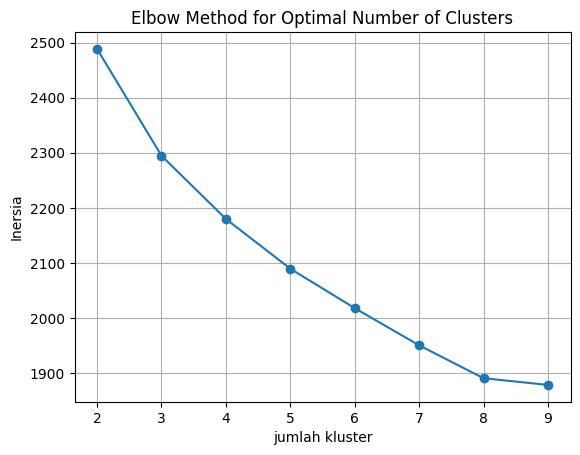

In [ ]:
# Pisahkan kolom-kolom numerik
numerical_columns = data_encoded.drop(['original_title', 'vote_average'], axis=1)

# Menyimpan inersia untuk setiap jumlah cluster
inertia = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_columns)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('jumlah kluster')
plt.ylabel('Inersia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(k_range)
plt.grid(True)
plt.show()

pada visualisasi diatas bisa kita ketahui bahwa sumbu x merupakan jumlah kluster dan sumbu y merupakan inersia. kita dapat menentukan jumlah klaster yang optimal berdasarkan dimana penurunan inersia berkurang secara signifikan seperti siku atau yang paling patah

###**Build Model**

#####**Split Data**

In [ ]:
X_train, X_test = train_test_split(data_encoded, test_size=0.2, random_state=42)

pada tahap split data kita membagi data_encoded menjadi 2 bagian yaitu X_train (data untuk melatih model) dan X_Test (data untuk menguji performa model). dalam hal ini 80% data akan dipake buat data latih dan 20% dipake buat data uji

#####**K-Means**

######Membuat Model K-Means

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train.drop(['original_title'], axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

pada code diatas kita menggunakan algoritma K-Means untuk melakukan klusterisasi data latih. model K-Means dibuat dengan jumlah 3 kluster. kemudian model dilatih menggunakan fitur fitur dari data latih kecuali kolom orginal_title karena kolom tersebut tidak relevan

######Membuat Label Kluster

In [ ]:
# Dapatkan label kluster untuk setiap film pada data latih dan data uji
train_cluster_labels = kmeans.predict(X_train.drop(['original_title'], axis=1))
test_cluster_labels = kmeans.predict(X_test.drop(['original_title'], axis=1))

# Tambahkan kolom 'cluster' ke DataFrame
X_train.insert(0, 'cluster', train_cluster_labels)
X_test.insert(0, 'cluster', test_cluster_labels)

setelah jumlah kluster telah ditentukan kita dapat mebemberi label kluster untuk setiap data film pada data latih dan data uji menggunakan model K-Means yang telah dilatih sebelumnyaa dan kemudian kita tambahkan kolom cluster ke dataframe X_train dan X_test untuk menandai klaster mana yang dimiliki oleh setiap data tersebut

In [ ]:
X_train.head(5)

,cluster,original_title,vote_average,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,000,06,13,1950,1978,20,2001,3000,33⅓,34th,37th,39,42nd,45,98,about,above,ace,across,action,addams,addiction,ado,adventure,adventures,affair,africa,african,after,afternoon,again,age,agent,agua,ailes,air,airheads,aladdin,alaska,algiers,alice,all,alles,alone,alphaville,amarga,amateur,amazing,america,american,an,and,andre,andy,angel,angela,angels,angus,anne,another,antonia,antonin,anything,apartment,aphrodite,apollo,apple,aristocats,arms,army,arnaud,around,arrest,arrival,arrow,artaud,arthur,as,asfour,assassination,assassins,associé,at,august,aus,aventure,away,awfully,axe,azúcar,babe,baby,babysitter,backbeat,bacon,bad,badman,balto,band,bank,barb,barbarella,barcelona,basketball,basquiat,batman,be,beach,bear,beast,beat,beautiful,beauty,bed,bedknobs,bedlam,before,being,belges,bell,belle,beloved,benjamenta,best,between,beverly,bewegte,beyond,bhaji,bible,big,bilder,bilko,bill,billy,binds,bio,birdcage,birthday,bite,bites,bits,bitter,black,blade,blanc,bleeding,bleu,blink,bliss,blood,bloodline,bloodsport,blown,blu,blue,blues,blustery,bobby,boca,body,bogus,bolle,bomb,bondage,bone,bonheur,book,boomerang,bordello,born,bottle,bouki,boulevard,bound,boxing,boy,boys,brady,brain,braveheart,breakfast,bride,bridges,bringing,broadway,broken,bronx,brooklyn,broomsticks,bros,brother,brothers,browning,bruder,brunswick,buddha,buffalo,bug,bulletproof,bullets,bully,bunch,burden,burlesque,bus,bushwhacked,but,butterfly,by,bye,bűvös,caballeros,cabin,cable,calendar,call,called,calls,came,canadian,candy,candyman,captives,caraboo,careful,carlito,caro,carpool,carried,carrington,casablanca,casino,casper,castle,cat,catch,cats,catwalk,caught,cause,caution,cavo,ce,celluloid,celtic,central,century,chabert,chain,chamber,charade,chasers,che,checks,cherbourg,chips,chocolate,christmas,cinderella,cioccolata,circle,citizen,city,cité,claiborne,clause,clean,clear,clerks,client,cliffhanger,clockers,close,closet,clouds,club,clueless,cobb,cold,coldblooded,collectionneuse,collins,colonel,color,colored,comfort,como,compagnie,company,condition,coneheads,confessionnal,confused,congo,conspiracy,convento,cool,cop,cops,copycat,correspondent,corrina,cosi,could,couleurs,country,county,coup,courage,court,cowboy,cowgirls,craft,crazy,creatures,crime,criminal,crimson,crockett,cronos,crooklyn,crossfire,crossing,crow,crumb,cry,crypt,crímenes,cup,cupboard,curdled,cure,curly,curse,cuts,cutthroat,cyberspace,d3,da,dad,daens,dame,damned,damsel,dance,dances,danger,dangerous,dans,dark,darkness,darn,das,dave,davy,dawn,day,daylight,days,dazed,de,dead,deadly,dear,death,deaths,debutante,decision,degrees,dellamore,dellamorte,delle,delta,demarco,demolition,demon,deng,denise,denver,der,des,desert,desperado,destiny,detective,deux,devil,diabolique,diaries,diario,die,diebinnen,diggers,dingo,dirty,disaster,disclosure,distance,distress,divorcee,do,doe,dog,dogs,dollhouse,dolores,dome,don,doom,dos,double,doubtfire,down,dr,dracula,dragon,dragonheart,dream,dreams,dredd,dress,drinking,drive,driver,drop,du,ducks,dumb,dumber,dumbo,dumpling,dunkle,dunston,dusk,duty,dwarfs,earp,earrings,earth,east,eating,echte,eclipse,ed,eddie,eden,effect,eighty,emma,en,end,endless,enfants,enfer,engel,englishman,eraser,escape,eso,est,etz,eve,even,everyone,everything,evil,executive,exhale,exit,exotica,extraordinaires,extreme,eye,eyre,face,faces,factory,fair,faithful,falcon,fall,falling,falls,family,fan,far,farewell,fargo,farinelli,farm,faster,fatal,fate,father,fauntleroy,fauves,favor,favorite,fear,fearless,federal,feeling,fell,fiction,fighter,film,films,final,fine,fire,firm,first,fischer,fish,fishin,flanders,fled,fleiss,flesh,flintstones,flipper,flirt,flirting,flor,fluke,fly,folks,foo,fool,for,force,foreign,forever,forget,forrest,fort,four,fox,foxfire,france,francisco,frank,frankenstein,frankie,freak,free,freedom,freeway,french,fresa,fresh,f

output menunjukan lima baris pertama dari dataframe X_train dengan tambahan kolom kluster

In [ ]:
X_test.head(5)

,cluster,original_title,vote_average,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,000,06,13,1950,1978,20,2001,3000,33⅓,34th,37th,39,42nd,45,98,about,above,ace,across,action,addams,addiction,ado,adventure,adventures,affair,africa,african,after,afternoon,again,age,agent,agua,ailes,air,airheads,aladdin,alaska,algiers,alice,all,alles,alone,alphaville,amarga,amateur,amazing,america,american,an,and,andre,andy,angel,angela,angels,angus,anne,another,antonia,antonin,anything,apartment,aphrodite,apollo,apple,aristocats,arms,army,arnaud,around,arrest,arrival,arrow,artaud,arthur,as,asfour,assassination,assassins,associé,at,august,aus,aventure,away,awfully,axe,azúcar,babe,baby,babysitter,backbeat,bacon,bad,badman,balto,band,bank,barb,barbarella,barcelona,basketball,basquiat,batman,be,beach,bear,beast,beat,beautiful,beauty,bed,bedknobs,bedlam,before,being,belges,bell,belle,beloved,benjamenta,best,between,beverly,bewegte,beyond,bhaji,bible,big,bilder,bilko,bill,billy,binds,bio,birdcage,birthday,bite,bites,bits,bitter,black,blade,blanc,bleeding,bleu,blink,bliss,blood,bloodline,bloodsport,blown,blu,blue,blues,blustery,bobby,boca,body,bogus,bolle,bomb,bondage,bone,bonheur,book,boomerang,bordello,born,bottle,bouki,boulevard,bound,boxing,boy,boys,brady,brain,braveheart,breakfast,bride,bridges,bringing,broadway,broken,bronx,brooklyn,broomsticks,bros,brother,brothers,browning,bruder,brunswick,buddha,buffalo,bug,bulletproof,bullets,bully,bunch,burden,burlesque,bus,bushwhacked,but,butterfly,by,bye,bűvös,caballeros,cabin,cable,calendar,call,called,calls,came,canadian,candy,candyman,captives,caraboo,careful,carlito,caro,carpool,carried,carrington,casablanca,casino,casper,castle,cat,catch,cats,catwalk,caught,cause,caution,cavo,ce,celluloid,celtic,central,century,chabert,chain,chamber,charade,chasers,che,checks,cherbourg,chips,chocolate,christmas,cinderella,cioccolata,circle,citizen,city,cité,claiborne,clause,clean,clear,clerks,client,cliffhanger,clockers,close,closet,clouds,club,clueless,cobb,cold,coldblooded,collectionneuse,collins,colonel,color,colored,comfort,como,compagnie,company,condition,coneheads,confessionnal,confused,congo,conspiracy,convento,cool,cop,cops,copycat,correspondent,corrina,cosi,could,couleurs,country,county,coup,courage,court,cowboy,cowgirls,craft,crazy,creatures,crime,criminal,crimson,crockett,cronos,crooklyn,crossfire,crossing,crow,crumb,cry,crypt,crímenes,cup,cupboard,curdled,cure,curly,curse,cuts,cutthroat,cyberspace,d3,da,dad,daens,dame,damned,damsel,dance,dances,danger,dangerous,dans,dark,darkness,darn,das,dave,davy,dawn,day,daylight,days,dazed,de,dead,deadly,dear,death,deaths,debutante,decision,degrees,dellamore,dellamorte,delle,delta,demarco,demolition,demon,deng,denise,denver,der,des,desert,desperado,destiny,detective,deux,devil,diabolique,diaries,diario,die,diebinnen,diggers,dingo,dirty,disaster,disclosure,distance,distress,divorcee,do,doe,dog,dogs,dollhouse,dolores,dome,don,doom,dos,double,doubtfire,down,dr,dracula,dragon,dragonheart,dream,dreams,dredd,dress,drinking,drive,driver,drop,du,ducks,dumb,dumber,dumbo,dumpling,dunkle,dunston,dusk,duty,dwarfs,earp,earrings,earth,east,eating,echte,eclipse,ed,eddie,eden,effect,eighty,emma,en,end,endless,enfants,enfer,engel,englishman,eraser,escape,eso,est,etz,eve,even,everyone,everything,evil,executive,exhale,exit,exotica,extraordinaires,extreme,eye,eyre,face,faces,factory,fair,faithful,falcon,fall,falling,falls,family,fan,far,farewell,fargo,farinelli,farm,faster,fatal,fate,father,fauntleroy,fauves,favor,favorite,fear,fearless,federal,feeling,fell,fiction,fighter,film,films,final,fine,fire,firm,first,fischer,fish,fishin,flanders,fled,fleiss,flesh,flintstones,flipper,flirt,flirting,flor,fluke,fly,folks,foo,fool,for,force,foreign,forever,forget,forrest,fort,four,fox,foxfire,france,francisco,frank,frankenstein,frankie,freak,free,freedom,freeway,french,fresa,fresh,f

output menunjukan lima baris pertama dari dataframe X_test dengan tambahan kolom kluster

######Identifikasi Klustering

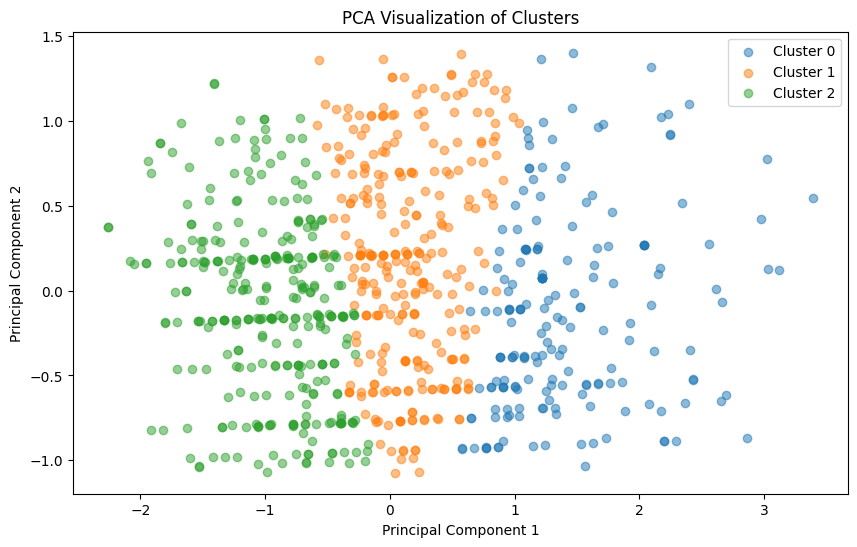

In [ ]:
#  Reduksi dimensi data dengan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train.drop(['original_title', 'cluster'], axis=1))

# Gabungkan label kluster dengan komponen utama
cluster_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
cluster_df['cluster'] = train_cluster_labels

# Visualisasi
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(cluster_df.loc[cluster_df['cluster'] == cluster, 'PC1'],
                cluster_df.loc[cluster_df['cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.legend()
plt.show()

bisa kita lihat visualisasi menggunakan PCA dari kluster data diatas, bahwa setiap titik pada grafik mewakili sebuah film yang ada dan diwarnai berdasarkan klaster yang ditentukan oleh model. hal ini akan membantu memahami pola dan hubungan antar klaster dalam data secara visual

######Memberikan Hasil Rekomendasi

In [ ]:
def recommend_similar_movies(input_title, data_encoded, cluster_labels, n_recommendations=5):
    # Temukan data film input
    input_movie_index = data_encoded.index[data_encoded['original_title'] == input_title][0]

    # Temukan label kluster film input
    input_movie_cluster = cluster_labels[input_movie_index]

    # Cari film lain yang memiliki label kluster yang sama dengan film input di data latih
    similar_movies_indices = [i for i, label in enumerate(cluster_labels) if label == input_movie_cluster and i != input_movie_index]
    similar_movies = data_encoded.iloc[similar_movies_indices]

    # Ambil 5 film dengan cluster dengan label yang sama secara acak, asalkan klusternya sama
    recommended_movies = similar_movies.sample(n=n_recommendations, random_state=42)

    # Dapatkan judul film yang direkomendasikan
    recommended_titles = recommended_movies['original_title'].tolist()

    return recommended_titles

# Contoh penggunaan
input_title = 'The Lion King'
recommended_movies = recommend_similar_movies(input_title, data_encoded, train_cluster_labels)
print("Rekomendasi Movie untuk {}:".format(input_title))
for movie in recommended_movies:
    print("- {}".format(movie))


Rekomendasi Movie untuk The Lion King:
- Free Willy
- Aladdin
- Mallrats
- Beverly Hills Cop III
- Get Shorty


fungsi 'recommend_similar_movies' bertujuan untuk merekomendasikan film-film serupa berdasarkan judul film input. pertama fungsi menentukan indeks film input dan klusternya kemudian mencari film-film lain dalam kluster yang sama dengan film yg telah diinput. setelah itu 5 film serupa dipilih secara acak dari kluster tersebut untuk direkomendasikan. dengan menggunakan fungsi ini pengguna dapat memperoleh rekomendasi film yang satu kluster dengan film inputannya

#####**Agglomerative**

######Menghitung dan Menampilkan Visualisasi Silhouette Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.19987971886554426


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.1462996258305388


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.11729446233715642


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.08561122090816192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.08081163613781228


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.08710225359442049


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.07718560963467379


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.07409327152336688


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.0630515464940002


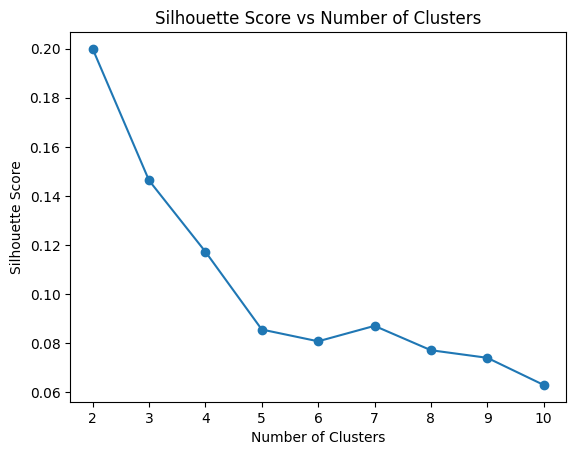

In [ ]:
# Hilangkan kolom 'original_title' dari X_train
X_train_numeric = X_train.drop('original_title', axis=1)

# Hitung Silhouette Score untuk berbagai jumlah cluster
silhouette_scores = []
for n_clusters in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = hc.fit_predict(X_train_numeric)
    silhouette_avg = silhouette_score(X_train_numeric, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

# Plot Silhouette Score untuk berbagai jumlah cluster
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

pertama disini kita menghilangkan kolom 'original_title' dari dataset latih (X_train) dan menggunakan model Agglomerative Clustering untuk menghitung nilai Silhouette Score untuk berbagai jumlah klaster. jika sebelumnya pada elbow method kita melihat dari patahannya, maka pada Silhouette Score kita dapat melihat nilai tertinggi untuk diambil sebagai indikasi jumlah klaster yang optimal untuk model clustering

######Membuat Model Latih HAC

In [ ]:
# Buat objek model HAC
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit model pada data latih
hc.fit(X_train_numeric)

# Prediksi cluster pada data uji
clusters = hc.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


disini kita membuat objek model Agglomerative Clustering dengan 2 kluster, kemudian model tersebut diproses untuk belajar pola dari data latih (X_train_numeric) dan digunakan untuk memprediksi kluster pada data uji.

######Menghitung dan Menampilkan Visualisasi Dendogram

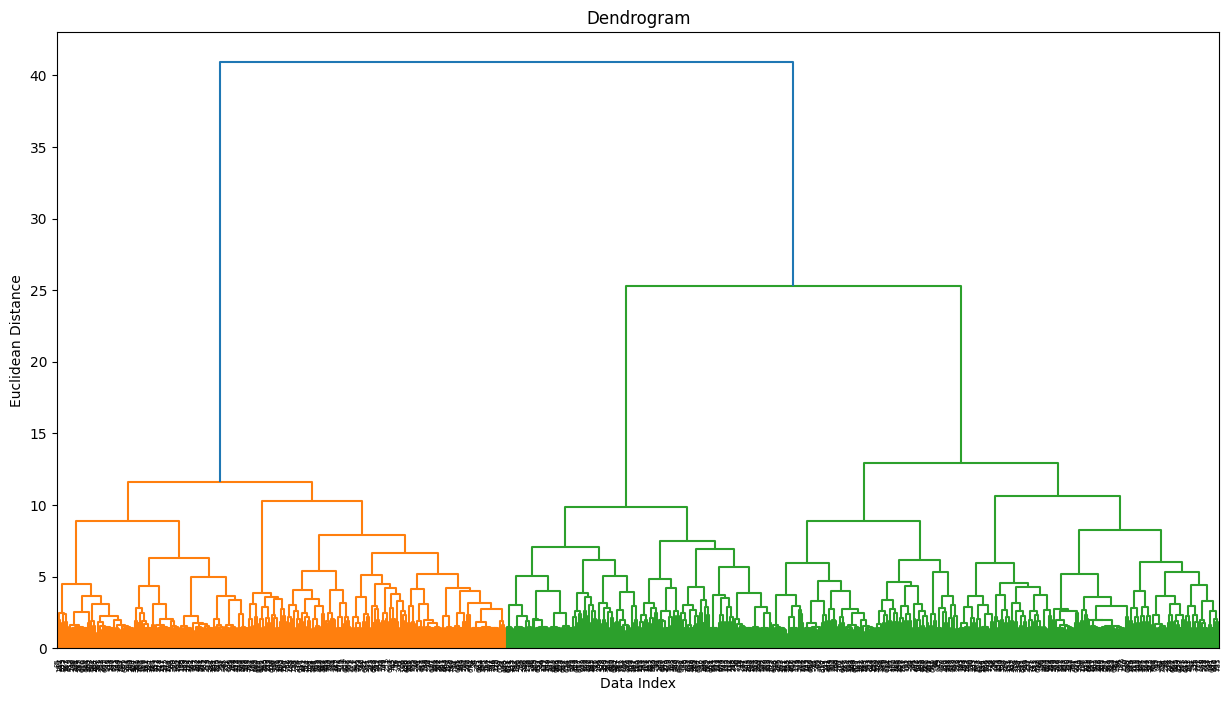

In [ ]:
# Hitung matriks jarak antar data
Z = linkage(X_train_numeric, method='ward')

# Buat dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z)
plt.xlabel('Data Index')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram')
plt.show()

selanjutnya kita bisa menggunakan matriks jarak antar data untuk membuat dendrogram, kita dapat memahami bagaimana data dihubungkan dan bagaimana klaster klaster tersebut terbentuk. ini membantu dalam memahami struktur klaster secara visual dan memungkinkan kita untuk membuat keputusan yang lebih baik dalam memilih jumlah klaster yang tepat

######Identifikasi Klustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


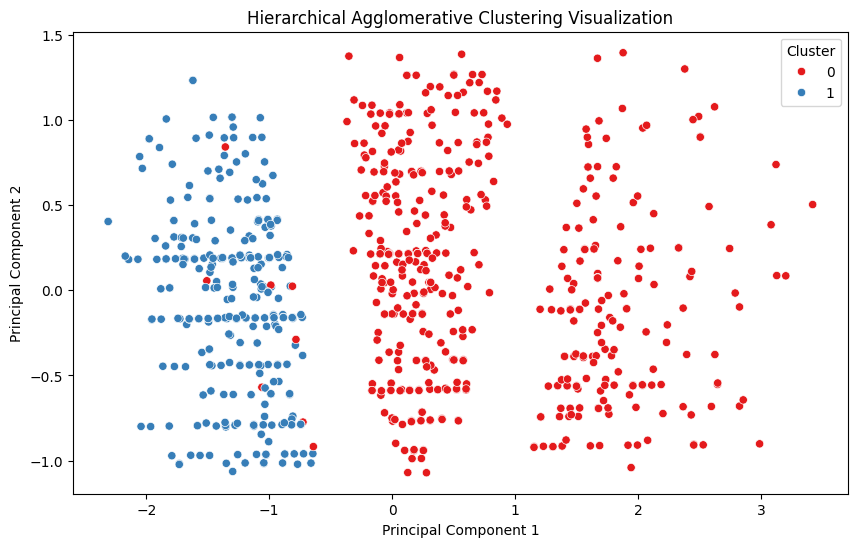

In [ ]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_numeric)

# Buat model HAC dengan jumlah cluster yang dipilih
n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = hc.fit_predict(X_train_numeric)

# Tampilkan visualisasi clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=cluster_labels, palette='Set1', legend='full')
plt.title('Hierarchical Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

setelah melakukan reduksi dimensi menggunakan PCA kita memilih jumlah klaster dengan nilai Silhouette Score tertinggi dari hasil sebelumnya yaitu 2. visualisasi ditampilkan dalam plot scatter yang menampilkan data dengan warna yang mewakili klaster yang diberikan oleh model HAC. Ini membantu memahami bagaimana data terkelompok dalam klaster yang berbeda dan bagaimana klaster tersebut terpisah secara visual

######Membuat Hasil Rekomendasi

In [ ]:
def recommend_similar_movies(input_title, data_encoded, cluster_labels, n_recommendations=5, model='kmeans'):
    # Temukan data film input
    input_movie_index = data_encoded.index[data_encoded['original_title'] == input_title][0]

    # Temukan label kluster film input
    input_movie_cluster = cluster_labels[input_movie_index]

    # Cari film lain yang memiliki label kluster yang sama dengan film input di data latih
    similar_movies_indices = [i for i, label in enumerate(cluster_labels) if label == input_movie_cluster and i != input_movie_index]
    similar_movies = data_encoded.iloc[similar_movies_indices]

    # Ambil n_recommendations film dengan cluster dengan label yang sama secara acak, asalkan klusternya sama
    if len(similar_movies) >= n_recommendations:
        recommended_movies = similar_movies.sample(n=n_recommendations, random_state=42)
    else:
        recommended_movies = similar_movies

    # Dapatkan judul film yang direkomendasikan
    recommended_titles = recommended_movies['original_title'].tolist()

    return recommended_titles

# Contoh penggunaan untuk Agglomerative Clustering
input_title = 'The Lion King'
recommended_movies = recommend_similar_movies(input_title, data_encoded, cluster_labels, model='agglomerative')
print("Rekomendasi Film untuk '{}':".format(input_title))
for movie in recommended_movies:
    print("- {}".format(movie))


Rekomendasi Film untuk 'The Lion King':
- Stealing Beauty
- Apollo 13
- Spy Hard
- Phat Beach
- Cold Comfort Farm


fungsi 'recommend_similar_movies' bertujuan untuk merekomendasikan film-film serupa berdasarkan judul film input. pertama fungsi menentukan indeks film input dan klusternya kemudian mencari film-film lain dalam kluster yang sama dengan film yg telah diinput. setelah itu 5 film serupa dipilih secara acak dari kluster tersebut untuk direkomendasikan. dengan menggunakan fungsi ini pengguna dapat memperoleh rekomendasi film yang satu kluster dengan film inputannya

####**Begins and Compare Clusters**

In [ ]:
numerical_columns = data_encoded.drop(['original_title'], axis=1)

kmeans_clust = kmeans.predict(numerical_columns)
hierarchy_clust = hc.fit_predict(numerical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
numerical_columns.reset_index(drop=True, inplace=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([ kmeans_col, hierarchy_col, numerical_columns], axis=1)

In [ ]:
combined_data_assoc.head()

,kmeans_cluster,hierarchy_cluster,vote_average,,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,000,06,13,1950,1978,20,2001,3000,33⅓,34th,37th,39,42nd,45,98,about,above,ace,across,action,addams,addiction,ado,adventure,adventures,affair,africa,african,after,afternoon,again,age,agent,agua,ailes,air,airheads,aladdin,alaska,algiers,alice,all,alles,alone,alphaville,amarga,amateur,amazing,america,american,an,and,andre,andy,angel,angela,angels,angus,anne,another,antonia,antonin,anything,apartment,aphrodite,apollo,apple,aristocats,arms,army,arnaud,around,arrest,arrival,arrow,artaud,arthur,as,asfour,assassination,assassins,associé,at,august,aus,aventure,away,awfully,axe,azúcar,babe,baby,babysitter,backbeat,bacon,bad,badman,balto,band,bank,barb,barbarella,barcelona,basketball,basquiat,batman,be,beach,bear,beast,beat,beautiful,beauty,bed,bedknobs,bedlam,before,being,belges,bell,belle,beloved,benjamenta,best,between,beverly,bewegte,beyond,bhaji,bible,big,bilder,bilko,bill,billy,binds,bio,birdcage,birthday,bite,bites,bits,bitter,black,blade,blanc,bleeding,bleu,blink,bliss,blood,bloodline,bloodsport,blown,blu,blue,blues,blustery,bobby,boca,body,bogus,bolle,bomb,bondage,bone,bonheur,book,boomerang,bordello,born,bottle,bouki,boulevard,bound,boxing,boy,boys,brady,brain,braveheart,breakfast,bride,bridges,bringing,broadway,broken,bronx,brooklyn,broomsticks,bros,brother,brothers,browning,bruder,brunswick,buddha,buffalo,bug,bulletproof,bullets,bully,bunch,burden,burlesque,bus,bushwhacked,but,butterfly,by,bye,bűvös,caballeros,cabin,cable,calendar,call,called,calls,came,canadian,candy,candyman,captives,caraboo,careful,carlito,caro,carpool,carried,carrington,casablanca,casino,casper,castle,cat,catch,cats,catwalk,caught,cause,caution,cavo,ce,celluloid,celtic,central,century,chabert,chain,chamber,charade,chasers,che,checks,cherbourg,chips,chocolate,christmas,cinderella,cioccolata,circle,citizen,city,cité,claiborne,clause,clean,clear,clerks,client,cliffhanger,clockers,close,closet,clouds,club,clueless,cobb,cold,coldblooded,collectionneuse,collins,colonel,color,colored,comfort,como,compagnie,company,condition,coneheads,confessionnal,confused,congo,conspiracy,convento,cool,cop,cops,copycat,correspondent,corrina,cosi,could,couleurs,country,county,coup,courage,court,cowboy,cowgirls,craft,crazy,creatures,crime,criminal,crimson,crockett,cronos,crooklyn,crossfire,crossing,crow,crumb,cry,crypt,crímenes,cup,cupboard,curdled,cure,curly,curse,cuts,cutthroat,cyberspace,d3,da,dad,daens,dame,damned,damsel,dance,dances,danger,dangerous,dans,dark,darkness,darn,das,dave,davy,dawn,day,daylight,days,dazed,de,dead,deadly,dear,death,deaths,debutante,decision,degrees,dellamore,dellamorte,delle,delta,demarco,demolition,demon,deng,denise,denver,der,des,desert,desperado,destiny,detective,deux,devil,diabolique,diaries,diario,die,diebinnen,diggers,dingo,dirty,disaster,disclosure,distance,distress,divorcee,do,doe,dog,dogs,dollhouse,dolores,dome,don,doom,dos,double,doubtfire,down,dr,dracula,dragon,dragonheart,dream,dreams,dredd,dress,drinking,drive,driver,drop,du,ducks,dumb,dumber,dumbo,dumpling,dunkle,dunston,dusk,duty,dwarfs,earp,earrings,earth,east,eating,echte,eclipse,ed,eddie,eden,effect,eighty,emma,en,end,endless,enfants,enfer,engel,englishman,eraser,escape,eso,est,etz,eve,even,everyone,everything,evil,executive,exhale,exit,exotica,extraordinaires,extreme,eye,eyre,face,faces,factory,fair,faithful,falcon,fall,falling,falls,family,fan,far,farewell,fargo,farinelli,farm,faster,fatal,fate,father,fauntleroy,fauves,favor,favorite,fear,fearless,federal,feeling,fell,fiction,fighter,film,films,final,fine,fire,firm,first,fischer,fish,fishin,flanders,fled,fleiss,flesh,flintstones,flipper,flirt,flirting,flor,fluke,fly,folks,foo,fool,for,force,foreign,forever,forget,forrest,fort,four,fox,foxfire,france,francisco,frank,frankenstein,frankie,freak,free,freedom,freeway,french,fre

perbedaan hasil klustering antara K-Means dan Hierarchical Clustering bisa disebabkan oleh algoritma yang digunakan dan cara kerja masing-masing algoritma. K-Means membagi data menjadi 3 kluster dengan memperbarui centroid berdasarkan jarak antara data dan centroid namun di sisi lain Hierarchical Clustering membangun hierarki kluster tanpa harus menentukan jumlah kluster sebelumnya dan pada model diatas menghasilkan 2 kluster, perbedaan hasil klustering juga dipengaruhi oleh metrik jarak dan kompleksitas data yg mengakibatkan perbedaan dalam representasi kluster

#**Evaluasi**

###Seberapa Sesuai Hasil Rekomendasi Film Untuk Pengguna Berdasarkan Label Klusternya